<a href="https://colab.research.google.com/github/spy129/MAT494/blob/main/HW2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2.4 Maximum Likelihood Estimation**

Maximum Likelihood Estimation in Python

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize

In [5]:
x = np.linspace(-10, 30, 100)
e = np.random.normal(10, 5, 100)
y = 10 + 4*x + e
df = pd.DataFrame({'x':x, 'y':y})
df.head()

,x,y
0,-10.000000,-20.462996
1,-9.595960,-20.275459
2,-9.191919,-16.919828
3,-8.787879,-17.006916
4,-8.383838,-10.441574


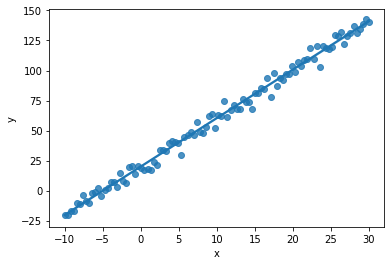

In [6]:
sns.regplot(x='x', y='y', data = df)
plt.show()

In [8]:
features = api.add_constant(df.x)
model = api.OLS(y, features).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.099e+04
Date:                Mon, 03 Oct 2022   Prob (F-statistic):          1.87e-102
Time:                        00:35:30   Log-Likelihood:                -291.03
No. Observations:                 100   AIC:                             586.1
Df Residuals:                      98   BIC:                             591.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0033      0.591     33.833      0.000      18.830      21.177
x              4.0352      0.038    104.854      0.000       3.959       4.112
==============================================================================
Omnibus:                        3.077   Durbin-Watson:                   2.391
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                2.514
Skew:                          -0.372   Prob(JB):                        0.284
Kurtosis:                       3.224   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
res = model.resid
standard_dev = np.std(res)
standard_dev

4.443321416807866

In [11]:
def MLE_Norm(parameters):
  const, beta, std_dev = parameters
  pred = const + beta*x
  LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
  neg_LL = -1*LL
  return neg_LL
mle_model = minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B')
mle_model

      fun: 291.03406968348963
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.70530242e-05, 3.41060515e-05, 1.70530258e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 240
      nit: 35
     njev: 60
   status: 0
  success: True
        x: array([20.00329287,  4.0352191 ,  4.44332159])

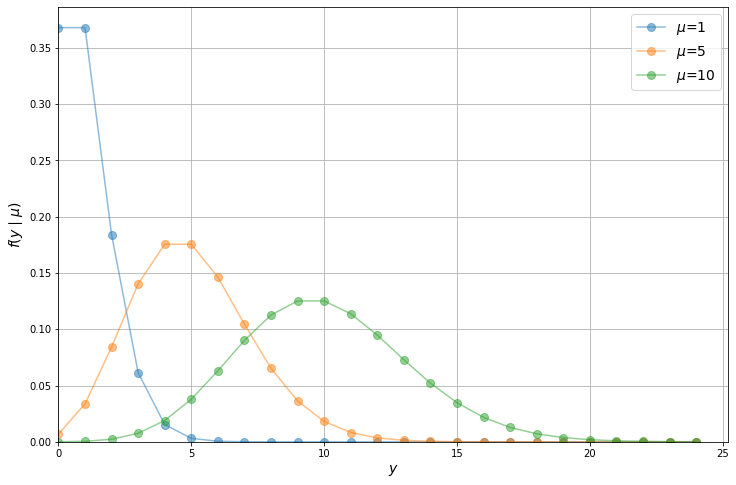

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
from numpy import exp
from scipy.special import factorial
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from statsmodels.api import Poisson
from scipy import stats
from scipy.stats import norm
from statsmodels.iolib.summary2 import summary_col
poisson_pmf = lambda y, μ: μ**y / factorial(y) * exp(-μ)
y_values = range(0, 25)

fig, ax = plt.subplots(figsize=(12, 8))

for μ in [1, 5, 10]:
    distribution = []
    for y_i in y_values:
        distribution.append(poisson_pmf(y_i, μ))
    ax.plot(y_values,
            distribution,
            label=f'$\mu$={μ}',
            alpha=0.5,
            marker='o',
            markersize=8)

ax.grid()
ax.set_xlabel('$y$', fontsize=14)
ax.set_ylabel('$f(y \mid \mu)$', fontsize=14)
ax.axis(xmin=0, ymin=0)
ax.legend(fontsize=14)

plt.show()

In [17]:
pd.options.display.max_columns = 10


df = pd.read_stata('https://github.com/QuantEcon/lecture-python/blob/master/source/_static/lecture_specific/mle/fp.dta?raw=true')
df.head()

,country,ccode,year,cyear,numbil,...,topint08,rintr,noyrs,roflaw,nrrents
0,United States,2.0,1990.0,21990.0,NaN,...,39.799999,4.988405,20.0,1.61,NaN
1,United States,2.0,1991.0,21991.0,NaN,...,39.799999,4.988405,20.0,1.61,NaN
2,United States,2.0,1992.0,21992.0,NaN,...,39.799999,4.988405,20.0,1.61,NaN
3,United States,2.0,1993.0,21993.0,NaN,...,39.799999,4.988405,20.0,1.61,NaN
4,United States,2.0,1994.0,21994.0,NaN,...,39.799999,4.988405,20.0,1.61,NaN


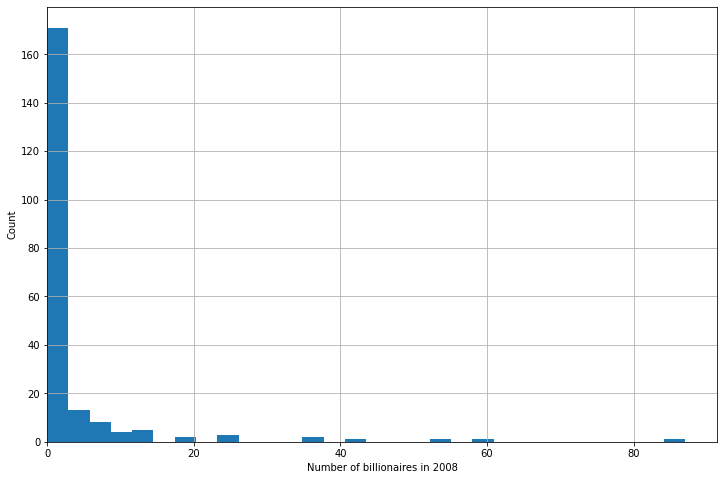

In [18]:
numbil0_2008 = df[(df['year'] == 2008) & (
    df['country'] != 'United States')].loc[:, 'numbil0']

plt.subplots(figsize=(12, 8))
plt.hist(numbil0_2008, bins=30)
plt.xlim(left=0)
plt.grid()
plt.xlabel('Number of billionaires in 2008')
plt.ylabel('Count')
plt.show()

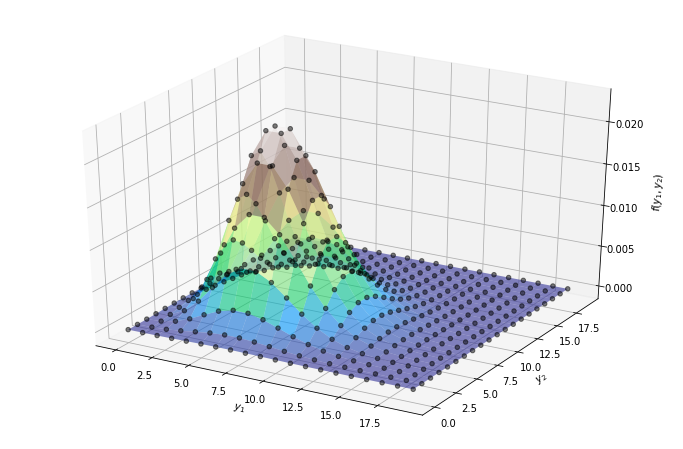

In [19]:
def plot_joint_poisson(μ=7, y_n=20):
    yi_values = np.arange(0, y_n, 1)

    # Create coordinate points of X and Y
    X, Y = np.meshgrid(yi_values, yi_values)

    # Multiply distributions together
    Z = poisson_pmf(X, μ) * poisson_pmf(Y, μ)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z.T, cmap='terrain', alpha=0.6)
    ax.scatter(X, Y, Z.T, color='black', alpha=0.5, linewidths=1)
    ax.set(xlabel='$y_1$', ylabel='$y_2$')
    ax.set_zlabel('$f(y_1, y_2)$', labelpad=10)
    plt.show()

plot_joint_poisson(μ=7, y_n=20)